In [1]:
import tensorflow as tf

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [9]:
from tensorflow.keras.applications import VGG16

In [10]:
conv_base = VGG16(weights = 'imagenet' , include_top = False , input_shape = (64,64,3))

In [11]:
classifier = Sequential()

# classifier.add(Conv2D(32 , (3,3) , input_shape = (64,64,3) , activation = 'relu'))
# classifier.add(Conv2D(32 , (3,3) , activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2,2)))

In [12]:
classifier.add(conv_base)
classifier.add(Flatten())
classifier.add(Dense(units = 256 , activation = 'relu'))
classifier.add(Dense(units = 1 , activation = 'sigmoid'))

In [13]:
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
import random
import shutil

In [17]:
all_images = os.listdir('kagglecatsanddogs_3367a\PetImages')
all_images

['Cat', 'Dog']

In [18]:
# all_cats = os.listdir(r'dataset\train\cats')

In [19]:
# all_dogs = os.listdir(r'dataset\train\dogs')

In [20]:
# int(len(all_dogs) - len(all_dogs)*0.2)

7999

In [21]:
# index_to_split = int(len(all_dogs) - len(all_dogs)*0.2)
# train_dog = all_dogs[:index_to_split]
# valid_dog = all_dogs[index_to_split:]

# index_to_split = int(len(all_cats) - len(all_cats)*0.2)
# train_cat = all_cats[:index_to_split]
# valid_cat = all_cats[index_to_split:]

In [22]:
# shutil.rmtree('./dataset')

In [24]:
# os.makedirs('./dataset/train/dogs' , exist_ok = True)

In [25]:
# os.makedirs('./dataset/valid/dogs' , exist_ok = True)
# os.makedirs('./dataset/train/cats' , exist_ok = True)
# os.makedirs('./dataset/valid/cats' , exist_ok = True)

In [26]:
# def copy_images(images_to_copy , destination , category):
#     for image in images_to_copy:
#         shutil.copyfile(f'D:\PYTHON_OVERALL\jupyter files\kagglecatsanddogs_3367a\PetImages\/{category}\/{image}',
#                        f'{destination}/{image}')

In [27]:
# copy_images(train_dog , './dataset/train/dogs' , 'Dog')

In [28]:
# copy_images(valid_dog , './dataset/valid/dogs' , 'Dog')
# copy_images(train_cat , './dataset/train/cats' , 'Cat')
# copy_images(valid_cat , './dataset/valid/cats' , 'Cat')

In [29]:
train = ImageDataGenerator(rescale = 1./255 , shear_range = 0.2 , zoom_range = 0.2 , horizontal_flip = True)

In [30]:
train_gen = train.flow_from_directory(r'dataset\train',
                                  target_size = (64,64) , batch_size = 32 , class_mode = 'binary')

Found 19998 images belonging to 2 classes.


In [31]:
test = ImageDataGenerator(rescale = 1./255 , shear_range = 0.2 , zoom_range = 0.2 , horizontal_flip = True)

In [32]:
test_gen = test.flow_from_directory(r'dataset\valid',
                                  target_size = (64,64) , batch_size = 32 , class_mode = 'binary')

Found 5000 images belonging to 2 classes.


In [35]:
steps_per_epoch = train_gen.samples//train_gen.batch_size
valid_steps = test_gen.samples//test_gen.batch_size

In [36]:
from PIL import ImageFile
ImageFile.LOAAD_TRUNCATED_IMAGES = True

In [37]:
classifier.fit(train_gen , steps_per_epoch = steps_per_epoch , epochs = 25 ,
               validation_data = test_gen , validation_steps = valid_steps , verbose = 1)

Epoch 1/25
624/624 [==============================] - ETA: 0s - loss: 0.7000 - accuracy: 0.5454

D:\Anaconda\envs\myenv\lib\site-packages\PIL\TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


624/624 [==============================] - 77s 115ms/step - loss: 0.7000 - accuracy: 0.5454 - val_loss: 0.6894 - val_accuracy: 0.5527
Epoch 2/25
624/624 [==============================] - 69s 110ms/step - loss: 0.5458 - accuracy: 0.7269 - val_loss: 0.4368 - val_accuracy: 0.7973
Epoch 3/25
624/624 [==============================] - 69s 110ms/step - loss: 0.4231 - accuracy: 0.8066 - val_loss: 0.3956 - val_accuracy: 0.8267
Epoch 4/25
624/624 [==============================] - 69s 110ms/step - loss: 0.3729 - accuracy: 0.8334 - val_loss: 0.3288 - val_accuracy: 0.8550
Epoch 5/25
624/624 [==============================] - 69s 110ms/step - loss: 0.3378 - accuracy: 0.8509 - val_loss: 0.3573 - val_accuracy: 0.8377
Epoch 6/25
624/624 [==============================] - 69s 111ms/step - loss: 0.3146 - accuracy: 0.8646 - val_loss: 0.3538 - val_accuracy: 0.8496
Epoch 7/25
624/624 [==============================] - 69s 111ms/step - loss: 0.3133 - accuracy: 0.8645 - val_loss: 0.3091 - val_accuracy: 0.8

In [38]:
steps_per_epoch

624

In [39]:
valid_steps

156

In [40]:
import numpy as np
from keras.preprocessing import image

In [61]:
test_image = image.load_img(r'dataset\train\cats\44.jpg' ,
                            target_size = (150,150))

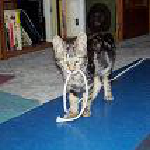

In [63]:
test_image

In [51]:
test_image = image.img_to_array(test_image)
test_image = test_image*(1./255)
test_image

array([[[1.1995387e-03, 4.4598238e-04, 5.0749717e-04],
        [1.1534026e-03, 6.3052680e-04, 2.1530184e-04],
        [1.0457517e-03, 5.8439065e-04, 9.5347955e-04],
        ...,
        [5.9976935e-04, 3.0757405e-04, 1.9992313e-04],
        [7.0742029e-04, 4.3060369e-04, 2.7681663e-04],
        [7.6893513e-04, 4.4598238e-04, 1.8454443e-04]],

       [[1.2610536e-03, 5.5363326e-04, 5.9976935e-04],
        [9.0734346e-04, 4.3060369e-04, 0.0000000e+00],
        [9.6885825e-04, 5.5363326e-04, 8.4582862e-04],
        ...,
        [5.8439065e-04, 2.9219533e-04, 1.9992313e-04],
        [6.4590550e-04, 3.3833145e-04, 1.9992313e-04],
        [7.5355644e-04, 4.3060369e-04, 1.6916572e-04]],

       [[1.1687813e-03, 5.5363326e-04, 5.6901196e-04],
        [8.1507122e-04, 3.9984626e-04, 0.0000000e+00],
        [7.3817774e-04, 3.9984626e-04, 5.8439065e-04],
        ...,
        [3.5371014e-04, 6.1514809e-05, 0.0000000e+00],
        [6.6128420e-04, 3.5371014e-04, 2.1530184e-04],
        [9.5347955e-04

In [53]:
test_image2 = np.expand_dims(test_image , axis = 0)

In [54]:
result = classifier.predict(test_image2)

In [55]:
result

array([[0.13908051]], dtype=float32)

In [48]:
if (result[0][0]==1):
    prediction = 'Dog'
else:
    prediction = 'Cat'
    
print(prediction)

Dog
